The objective in this excersize is analyze a dataset by performing PCA and linear regression.

Complete the relevant code after the corresponding cells.

Then upload the notebook to elearn.

Import necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

Load the california housing dataset

In [ ]:
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['MedHouseVal'] = california_housing.target
data = df.to_numpy()
print(data[0])
print(data[1])
print(data[2])


[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23          4.526     ]
[ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
  2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02
  3.58500000e+00]
[   7.2574       52.            8.28813559    1.07344633  496.
    2.80225989   37.85       -122.24          3.521     ]


Visualize the data e.g. *correlation matrices*, *scatterplots*, something else


In [ ]:
#Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
#Histogram
df.hist(bins=20, figsize=(20, 15))
plt.show()

In [ ]:
# Scatter plot for relationships between features
plt.figure(figsize=(30, 5))
for i, col in enumerate(df.columns[:9]):
    plt.subplot(1, 9, i+1)
    x = df[col]
    y = df['MedHouseVal']
    plt.scatter(x, y, marker='o')
    plt.title(col + ' and MedHouseVal')
    plt.xlabel(col)
    plt.ylabel('MedHouseVal')
plt.tight_layout()
plt.show()



split the data to training (80%) and test (20%) sets
and standarize the features if necessary

In [ ]:
# Split the data into features (X) and target variable (y)
X = data[:, :-1]  # Features are all columns except the last one
y = data[:, -1]   # Target variable is the last column

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X with no standarizing: ", X)
print("X train scaled: ", X_train_scaled)
print("X test scaled: ",X_test_scaled)


print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

X with no standarizing:  [[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
X train scaled:  [[-0.326196    0.34849025 -0.17491646 ...  0.05137609 -1.3728112
   1.27258656]
 [-0.03584338  1.61811813 -0.40283542 ... -0.11736222 -0.87669601
   0.70916212]
 [ 0.14470145 -1.95271028  0.08821601 ... -0.03227969 -0.46014647
  -0.44760309]
 ...
 [-0.49697313  0.58654547 -0.60675918 ...  0.02030568 -0.75500738
   0.59946887]
 [ 0.96545045 -1.07984112  0.40217517 ...  0.00707608  0.90651045
 

perform PCA to reduce the number of features

In [ ]:
# Perform PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("X train pca: ", X_train_pca)
print("X test pca: ", X_test_pca)

X train pca:  [[-1.77607399  0.78163776 -0.19050415  0.37781791  0.19942862  0.61537004]
 [-1.11238334 -0.08891209 -1.31988479 -0.25153688  0.2604481   0.98095036]
 [ 0.02349976  0.41250018  0.98376391 -0.137004   -0.50802234 -1.57076079]
 ...
 [-1.13082984 -0.04267792 -0.4743521   0.44313914  0.1938455   0.4336815 ]
 [ 1.34379455 -0.13470289  1.44684484 -0.66128026 -0.3170517  -0.29821543]
 [ 0.6528607  -2.04472169 -0.13810055  0.65967211  0.32294998  1.85997019]]
Shape of X_train: (16512, 6)
X test pca:  [[-4.32759161e-01 -5.08766735e-01 -4.12820608e-02  1.03887307e+00
   3.69652693e-02 -4.98863235e-01]
 [-2.31064976e-01 -4.34497872e-02 -2.45414332e-01  7.16332075e-01
   5.16658894e-02  6.73120645e-02]
 [ 1.11956130e+00 -1.78076051e+00 -8.64524754e-01 -5.78232639e-05
   2.31661364e-01  1.22048315e+00]
 ...
 [ 1.51548527e+00  1.42546396e-01  1.28295069e+00 -2.55807537e+00
  -2.87934388e-01  4.27876620e-01]
 [ 1.86563640e-01 -7.06809148e-01 -4.49952083e-01  3.19102629e-01
   8.21502807

provide scatterplots for the case of projections in 2 and 3 dimensions

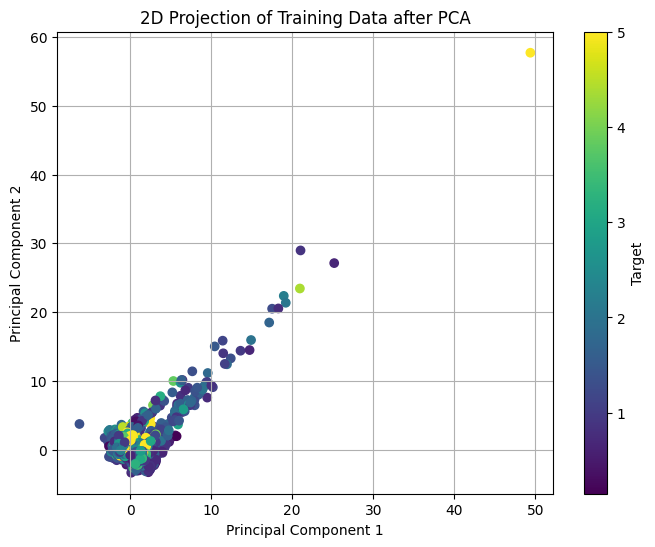

In [ ]:
#2D projections
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D Projection of Training Data after PCA')
plt.colorbar(label='Target')
plt.grid(True)
plt.show()

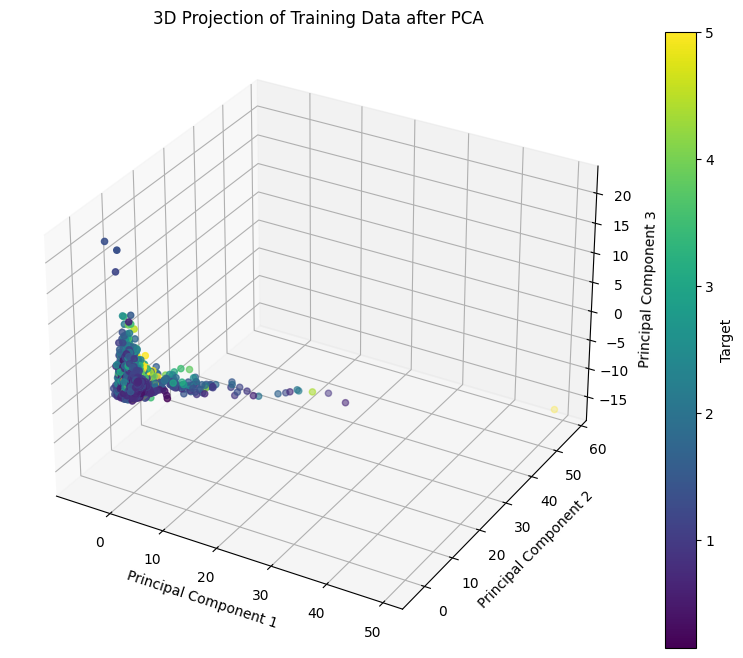

In [ ]:
#3D projection
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='viridis')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.title('3D Projection of Training Data after PCA')
plt.colorbar(scatter, label='Target')
plt.grid(True)
plt.show()

perform linear regression using the original features

In [ ]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model using the original features
model.fit(X_train_scaled, y_train)

# Make predictions on the training set
y_train_pred = model.predict(X_train_scaled)

# Make predictions on the test set
y_test_pred = model.predict(X_test_scaled)

# Calculate the mean squared error on the training set
train_mse = mean_squared_error(y_train, y_train_pred)

# Calculate the mean squared error on the test set
test_mse = mean_squared_error(y_test, y_test_pred)

# Print the mean squared errors
print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 0.5179331255246699
Test MSE: 0.5558915986952442


perform linear regression using PCA-reduced features

In [ ]:
# Create a Linear Regression model
model_pca = LinearRegression()

# Fit the model using the PCA-reduced features
model_pca.fit(X_train_pca, y_train)

# Make predictions on the training set
y_train_pred_pca = model_pca.predict(X_train_pca)

# Make predictions on the test set
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculate the mean squared error on the training set
train_mse_pca = mean_squared_error(y_train, y_train_pred_pca)

# Calculate the mean squared error on the test set
test_mse_pca = mean_squared_error(y_test, y_test_pred_pca)

# Print the mean squared errors
print("Train MSE (PCA):", train_mse_pca)
print("Test MSE (PCA):", test_mse_pca)

Train MSE (PCA): 0.6602959589828863
Test MSE (PCA): 0.6713632829708934


Compare the perfornance of linear regression on the original vs the PCA features

In [ ]:
# Create Linear Regression models
model_original = LinearRegression()
model_pca = LinearRegression()

# Fit the models using the original and PCA-reduced features
model_original.fit(X_train_scaled, y_train)
model_pca.fit(X_train_pca, y_train)

# Make predictions on the training and test sets
y_train_pred_original = model_original.predict(X_train_scaled)
y_test_pred_original = model_original.predict(X_test_scaled)
y_train_pred_pca = model_pca.predict(X_train_pca)
y_test_pred_pca = model_pca.predict(X_test_pca)

# Calculate evaluation metrics for the original features
train_mse_original = mean_squared_error(y_train, y_train_pred_original)
test_mse_original = mean_squared_error(y_test, y_test_pred_original)
train_r2_original = r2_score(y_train, y_train_pred_original)
test_r2_original = r2_score(y_test, y_test_pred_original)

# Calculate evaluation metrics for the PCA-reduced features
train_mse_pca = mean_squared_error(y_train, y_train_pred_pca)
test_mse_pca = mean_squared_error(y_test, y_test_pred_pca)
train_r2_pca = r2_score(y_train, y_train_pred_pca)
test_r2_pca = r2_score(y_test, y_test_pred_pca)

# Print the evaluation metrics
print("Performance on original features:")
print("Train MSE:", train_mse_original)
print("Test MSE:", test_mse_original)
print("Train R2 Score:", train_r2_original)
print("Test R2 Score:", test_r2_original)
print("\nPerformance on PCA-reduced features:")
print("Train MSE (PCA):", train_mse_pca)
print("Test MSE (PCA):", test_mse_pca)
print("Train R2 Score (PCA):", train_r2_pca)
print("Test R2 Score (PCA):", test_r2_pca)

Quantify the impact of the number of principal components on the regression
?

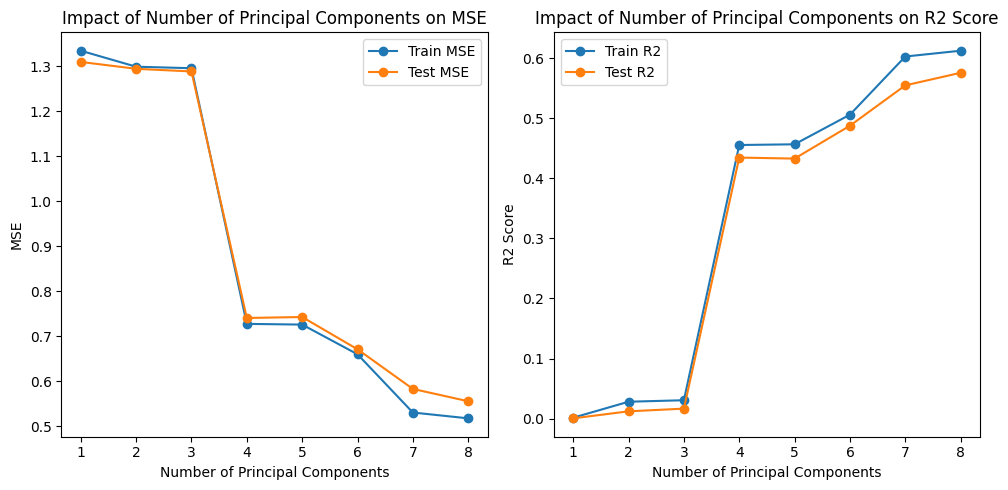

In [ ]:
# Define a range of number of principal components to consider
num_components_range = range(1, X_train_scaled.shape[1] + 1)

# Initialize lists to store MSE and R2 scores
train_mse_scores = []
test_mse_scores = []
train_r2_scores = []
test_r2_scores = []

for n_components in num_components_range:
    # Create PCA object with the specified number of components
    pca = PCA(n_components=n_components)

    # Fit and transform the training data
    X_train_pca = pca.fit_transform(X_train_scaled)

    # Transform the test data
    X_test_pca = pca.transform(X_test_scaled)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train_pca, y_train)

    # Make predictions on training and test sets
    y_train_pred = model.predict(X_train_pca)
    y_test_pred = model.predict(X_test_pca)

    # Calculate MSE and R2 scores for training and test sets
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Append scores to lists
    train_mse_scores.append(train_mse)
    test_mse_scores.append(test_mse)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)

# Plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(num_components_range, train_mse_scores, label='Train MSE', marker='o')
plt.plot(num_components_range, test_mse_scores, label='Test MSE', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Impact of Number of Principal Components on MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(num_components_range, train_r2_scores, label='Train R2', marker='o')
plt.plot(num_components_range, test_r2_scores, label='Test R2', marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('R2 Score')
plt.title('Impact of Number of Principal Components on R2 Score')
plt.legend()

plt.tight_layout()
plt.show()